Music recommendation system

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import statsmodels.api as sm
from warnings import filterwarnings
import os
from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

filterwarnings('ignore')

In [3]:
songs_data = pd.read_csv('top 100 streamed songs.csv').drop(columns=['id'])
songs_data.head()

name  duration  energy  key  \
0                            Good 4 U Olivia Rodrigo      2.97   0.664    9   
1                 Stay The Kid LAROI & Justin Bieber      2.30   0.506    8   
2                   Levitating Dua Lipa feat. DaBaby      3.38   0.825    6   
3  Peaches Justin Bieber feat. Daniel Caesar & Gi...      3.30   0.696    0   
4           Montero (Call Me By Your Name) Lil Nas X      2.30   0.503    8   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -5.044     1       0.1540       0.33500             0.000    0.0849   
1   -11.275     1       0.0589       0.37900             0.868    0.1100   
2    -3.787     0       0.0601       0.00883             0.000    0.0674   
3    -6.181     1       0.1190       0.32100             0.000    0.4200   
4    -6.725     0       0.2200       0.29300             0.000    0.4050   

   valence    tempo  danceability  
0    0.688  166.928         0.563  
1    0.454  170.054         0.564  
2    0.915  102.977         0.702  
3    0.464   90.030         0.677  
4    0.710  178.781         0.593

In [4]:
songs_data.shape

(100, 13)

In [5]:
songs = songs_data.drop(columns=['name'])
songs

duration  energy  key  loudness  mode  speechiness  acousticness  \
0       2.97   0.664    9    -5.044     1       0.1540       0.33500   
1       2.30   0.506    8   -11.275     1       0.0589       0.37900   
2       3.38   0.825    6    -3.787     0       0.0601       0.00883   
3       3.30   0.696    0    -6.181     1       0.1190       0.32100   
4       2.30   0.503    8    -6.725     0       0.2200       0.29300   
..       ...     ...  ...       ...   ...          ...           ...   
95      3.30   0.696    0    -6.181     1       0.1190       0.32100   
96      3.37   0.748   11    -5.922     0       0.0589       0.30500   
97      2.91   0.340   11    -7.773     0       0.0697       0.21800   
98      3.45   0.754    1    -6.684     1       0.0615       0.01510   
99      2.30   0.503    8    -6.725     0       0.2200       0.29300   

    instrumentalness  liveness  valence    tempo  danceability  
0              0.000    0.0849    0.688  166.928         0.563  
1              0.868    0.1100    0.454  170.054         0.564  
2              0.000    0.0674    0.915  102.977         0.702  
3              0.000    0.4200    0.464   90.030         0.677  
4              0.000    0.4050    0.710  178.781         0.593  
..               ...       ...      ...      ...           ...  
95             0.000    0.4200    0.464   90.030         0.677  
96             0.000    0.0811    0.964  163.984         0.672  
97             0.130    0.0550    0.716   94.009         0.889  
98             0.000    0.0486    0.755  149.789         0.752  
99             0.000    0.4050    0.710  178.781         0.593  

[100 rows x 12 columns]

In [6]:
songs.shape

(100, 12)

In [7]:
songs.head()

duration  energy  key  loudness  mode  speechiness  acousticness  \
0      2.97   0.664    9    -5.044     1       0.1540       0.33500   
1      2.30   0.506    8   -11.275     1       0.0589       0.37900   
2      3.38   0.825    6    -3.787     0       0.0601       0.00883   
3      3.30   0.696    0    -6.181     1       0.1190       0.32100   
4      2.30   0.503    8    -6.725     0       0.2200       0.29300   

   instrumentalness  liveness  valence    tempo  danceability  
0             0.000    0.0849    0.688  166.928         0.563  
1             0.868    0.1100    0.454  170.054         0.564  
2             0.000    0.0674    0.915  102.977         0.702  
3             0.000    0.4200    0.464   90.030         0.677  
4             0.000    0.4050    0.710  178.781         0.593

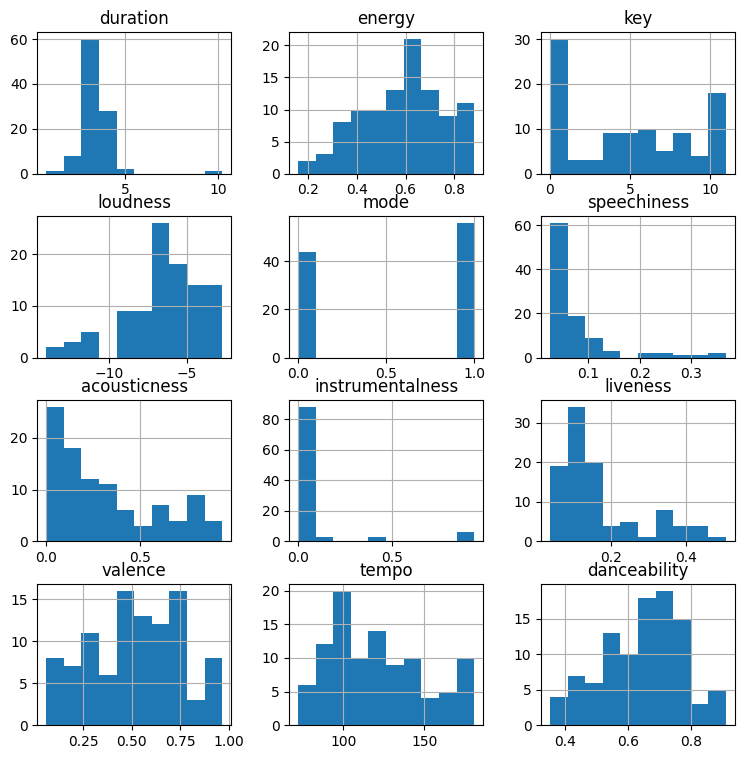

In [ ]:
songs.hist(figsize = (9,9));

In [8]:
songs.describe().T

count        mean        std       min        25%       50%  \
duration          100.0    3.404900   0.927022   0.73000   2.910000    3.3700   
energy            100.0    0.587650   0.168273   0.15700   0.477750    0.6090   
key               100.0    5.050000   3.825420   0.00000   1.000000    5.0000   
loudness          100.0   -6.577120   2.447338 -14.06700  -7.676250   -6.2625   
mode              100.0    0.560000   0.498888   0.00000   0.000000    1.0000   
speechiness       100.0    0.075461   0.068065   0.02530   0.036100    0.0518   
acousticness      100.0    0.314539   0.281076   0.00028   0.090750    0.2385   
instrumentalness  100.0    0.070682   0.221947   0.00000   0.000000    0.0000   
liveness          100.0    0.161737   0.112657   0.03410   0.088375    0.1200   
valence           100.0    0.517354   0.237512   0.05920   0.329000    0.5420   
tempo             100.0  121.548260  29.148613  71.88400  97.476250  117.0375   
danceability      100.0    0.647900   0.126942   0.35200   0.566750    0.6635   

                         75%      max  
duration            3.630000   10.220  
energy              0.707750    0.883  
key                 8.000000   11.000  
loudness           -4.786750   -2.724  
mode                1.000000    1.000  
speechiness         0.080650    0.368  
acousticness        0.519750    0.941  
instrumentalness    0.000083    0.941  
liveness            0.205250    0.509  
valence             0.711500    0.967  
tempo             141.733750  180.917  
danceability        0.734000    0.910

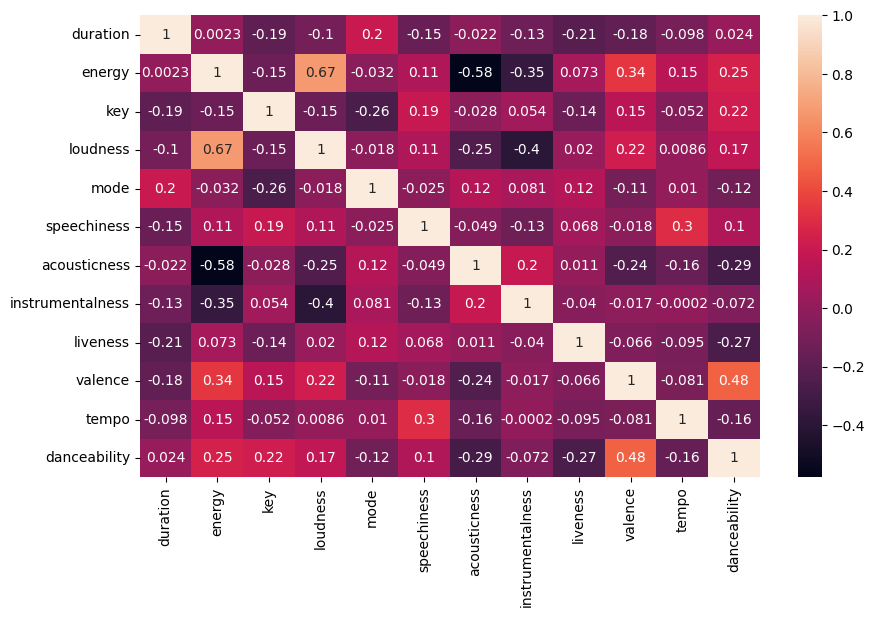

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(songs.corr(), annot=True)
plt.show()

## Method 1 : with Eucledian distance

In [10]:
song_features = songs.iloc[:,1:]
#scale
song_features_scaled =  StandardScaler().fit_transform(song_features)

def n_nearest_row(dataframe,input_row,n=5):
    print("Input song:\n",pd.DataFrame(songs.iloc[input_row,:]).T)

    distances = pdist(dataframe.values, metric='euclidean')
    dist_matrix = squareform(distances)
    distances_from_input_row = pd.DataFrame(dist_matrix)[input_row].sort_values()

    distances_from_input_row = distances_from_input_row[1:n+1].sort_index()
    nearest_rows = songs_data[songs.index.isin(distances_from_input_row.index)]

    output_df = pd.concat((nearest_rows,distances_from_input_row),axis=1)

    columns = list(songs_data.columns)
    columns.append("distance")
    output_df.columns=columns

    return output_df

nearest_5_row = n_nearest_row(song_features,96) # we will examine the first index
print("\n\nNearest songs: ")
nearest_5_row

Input song:
     duration  energy   key  loudness  mode  speechiness  acousticness  \
96      3.37   0.748  11.0    -5.922   0.0       0.0589         0.305   

    instrumentalness  liveness  valence    tempo  danceability  
96               0.0    0.0811    0.964  163.984         0.672  


Nearest songs: 


name  duration  energy  key  \
0                        Good 4 U Olivia Rodrigo      2.97   0.664    9   
1             Stay The Kid LAROI & Justin Bieber      2.30   0.506    8   
47  Cover Me In Sunshine P!nk & Willow Sage Hart      2.37   0.488    5   
58                Stressed Out twenty one pilots      3.37   0.637    4   
80        rockstar (feat. 21 Savage) Post Malone      3.64   0.520    5   

    loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0     -5.044     1       0.1540        0.3350          0.000000    0.0849   
1    -11.275     1       0.0589        0.3790          0.868000    0.1100   
47   -11.276     1       0.0568        0.0142          0.900000    0.1560   
58    -5.677     0       0.1410        0.0462          0.000023    0.0602   
80    -6.136     0       0.0712        0.1240          0.000070    0.1310   

    valence    tempo  danceability  distance  
0     0.688  166.928         0.563  3.813541  
1     0.454  170.054         0.564  8.751547  
47    0.107  160.013         0.543  9.118828  
58    0.648  169.977         0.734  9.228556  
80    0.129  159.801         0.585  7.371259

## Method 2 : with K-nearest

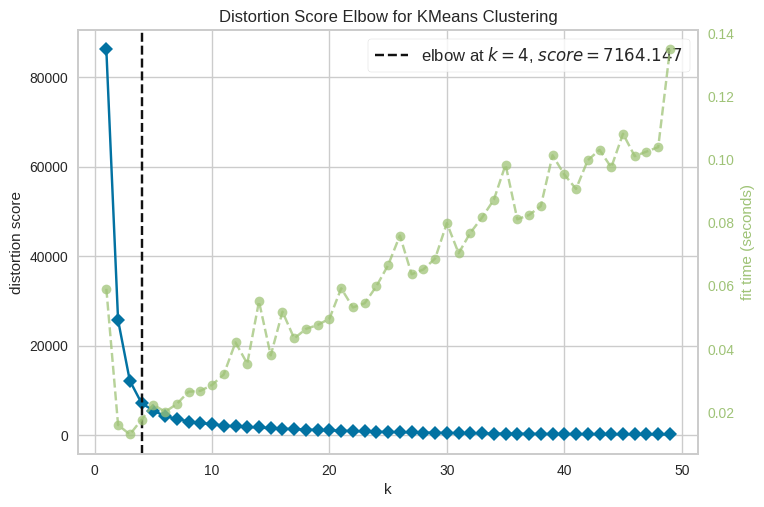

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# when (k=1,50)
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,50))

visualizer.fit(song_features)
visualizer.poof();

after fitting the visualizer to our features, we are able to determine the optimal value of k to 4.

In [12]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(song_features)
song_data_groups = pd.concat((songs_data, pd.DataFrame(kmeans.labels_,columns=['Group'])), axis=1)
song_data_groups.head(5)

name  duration  energy  key  \
0                            Good 4 U Olivia Rodrigo      2.97   0.664    9   
1                 Stay The Kid LAROI & Justin Bieber      2.30   0.506    8   
2                   Levitating Dua Lipa feat. DaBaby      3.38   0.825    6   
3  Peaches Justin Bieber feat. Daniel Caesar & Gi...      3.30   0.696    0   
4           Montero (Call Me By Your Name) Lil Nas X      2.30   0.503    8   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -5.044     1       0.1540       0.33500             0.000    0.0849   
1   -11.275     1       0.0589       0.37900             0.868    0.1100   
2    -3.787     0       0.0601       0.00883             0.000    0.0674   
3    -6.181     1       0.1190       0.32100             0.000    0.4200   
4    -6.725     0       0.2200       0.29300             0.000    0.4050   

   valence    tempo  danceability  Group  
0    0.688  166.928         0.563      2  
1    0.454  170.054         0.564      2  
2    0.915  102.977         0.702      1  
3    0.464   90.030         0.677      1  
4    0.710  178.781         0.593      2

In [14]:
group2 = song_data_groups[song_data_groups['Group']==2]
group2

name  duration  energy  key  \
0                        Good 4 U Olivia Rodrigo      2.97   0.664    9   
1             Stay The Kid LAROI & Justin Bieber      2.30   0.506    8   
4       Montero (Call Me By Your Name) Lil Nas X      2.30   0.503    8   
8                     Blinding Lights The Weeknd      3.33   0.730    1   
9                         Deja Vu Olivia Rodrigo      3.59   0.612    2   
21        Mood Swings (feat. Lil Tjay) Pop Smoke      3.56   0.602   10   
28               LA CANCIÓN J Balvin & Bad Bunny      4.04   0.646    7   
31             Blinding Lights - 2019 The Weeknd      3.31   0.517    5   
39                            Yonaguni Bad Bunny      3.45   0.648    1   
47  Cover Me In Sunshine P!nk & Willow Sage Hart      2.37   0.488    5   
58                Stressed Out twenty one pilots      3.37   0.637    4   
80        rockstar (feat. 21 Savage) Post Malone      3.64   0.520    5   
93                            Yonaguni Bad Bunny      3.45   0.648    1   
96               Dance With Me Tonight Olly Murs      3.37   0.748   11   
99      Montero (Call Me By Your Name) Lil Nas X      2.30   0.503    8   

    loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0     -5.044     1       0.1540       0.33500          0.000000    0.0849   
1    -11.275     1       0.0589       0.37900          0.868000    0.1100   
4     -6.725     0       0.2200       0.29300          0.000000    0.4050   
8     -5.934     1       0.0598       0.00146          0.000095    0.0897   
9     -7.222     1       0.1120       0.58400          0.000006    0.3700   
21    -6.335     0       0.3680       0.48700          0.000000    0.0848   
28    -5.795     1       0.3190       0.15200          0.000018    0.1080   
31   -11.580     0       0.0405       0.00150          0.000023    0.1180   
39    -4.601     1       0.1180       0.27600          0.000000    0.1350   
47   -11.276     1       0.0568       0.01420          0.900000    0.1560   
58    -5.677     0       0.1410       0.04620          0.000023    0.0602   
80    -6.136     0       0.0712       0.12400          0.000070    0.1310   
93    -4.601     1       0.1180       0.27600          0.000000    0.1350   
96    -5.922     0       0.0589       0.30500          0.000000    0.0811   
99    -6.725     0       0.2200       0.29300          0.000000    0.4050   

    valence    tempo  danceability  Group  
0     0.688  166.928         0.563      2  
1     0.454  170.054         0.564      2  
4     0.710  178.781         0.593      2  
8     0.334  171.005         0.514      2  
9     0.178  180.917         0.442      2  
21    0.269  179.798         0.480      2  
28    0.429  176.088         0.756      2  
31    0.438  171.012         0.609      2  
39    0.440  179.951         0.644      2  
47    0.107  160.013         0.543      2  
58    0.648  169.977         0.734      2  
80    0.129  159.801         0.585      2  
93    0.440  179.951         0.644      2  
96    0.964  163.984         0.672      2  
99    0.710  178.781         0.593      2

# ***or***

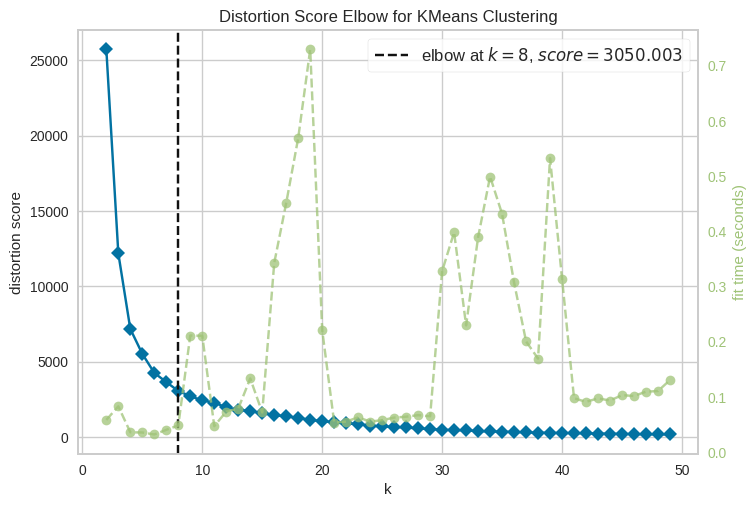

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# when (k=2,50)
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))

visualizer.fit(song_features)
visualizer.poof();

after fitting the visualizer to our features, we are able to determine the optimal value of k to 8

In [16]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(song_features)
song_data_groups_1 = pd.concat((songs_data, pd.DataFrame(kmeans.labels_,columns=['Group'])), axis=1)
song_data_groups_1.head(5)

name  duration  energy  key  \
0                            Good 4 U Olivia Rodrigo      2.97   0.664    9   
1                 Stay The Kid LAROI & Justin Bieber      2.30   0.506    8   
2                   Levitating Dua Lipa feat. DaBaby      3.38   0.825    6   
3  Peaches Justin Bieber feat. Daniel Caesar & Gi...      3.30   0.696    0   
4           Montero (Call Me By Your Name) Lil Nas X      2.30   0.503    8   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -5.044     1       0.1540       0.33500             0.000    0.0849   
1   -11.275     1       0.0589       0.37900             0.868    0.1100   
2    -3.787     0       0.0601       0.00883             0.000    0.0674   
3    -6.181     1       0.1190       0.32100             0.000    0.4200   
4    -6.725     0       0.2200       0.29300             0.000    0.4050   

   valence    tempo  danceability  Group  
0    0.688  166.928         0.563      0  
1    0.454  170.054         0.564      4  
2    0.915  102.977         0.702      1  
3    0.464   90.030         0.677      7  
4    0.710  178.781         0.593      4

In [17]:
group6 = song_data_groups_1[song_data_groups_1['Group']==6]
group6


name  duration  energy  key  \
5                 Kiss Me More (feat. SZA) Doja Cat      3.48   0.705    8   
10                              The Business Tiësto      2.73   0.620    8   
25           Me Gusta Anitta, Cardi B & Myke Towers      3.01   0.604    6   
29                  Someone You Loved Lewis Capaldi      3.04   0.405    1   
34                         Don't Start Now Dua Lipa      4.45   0.588    4   
43                             Falling Harry Styles      4.00   0.267    4   
48                       Save Your Tears The Weeknd      3.59   0.816    0   
52                            All of Me John Legend      4.49   0.264    8   
56                   DÁKITI Bad Bunny & Jhay Cortez      3.22   0.186    4   
64       Uptown Funk (feat. Bruno Mars) Mark Ronson      4.49   0.609    0   
65           Señorita Shawn Mendes & Camila Cabello      3.18   0.540    9   
66                      Before You Go Lewis Capaldi      3.59   0.575    3   
74                              Circles Post Malone      3.59   0.762    0   
81                     Don't Stop Believin' Journey      4.27   0.157    5   
84                Kiss Me More (feat. SZA) Doja Cat      3.48   0.705    8   
85                         Don't Start Now Dua Lipa      4.45   0.588    4   
94  Levitating - The Blessed Madonna Remix Dua Lipa      4.06   0.457   11   

    loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
5     -3.463     1       0.0284       0.25900          0.000089    0.1200   
10    -7.079     0       0.2320       0.41400          0.019200    0.1120   
25    -4.392     0       0.0820       0.44800          0.000000    0.0863   
29    -5.679     1       0.0319       0.75100          0.000000    0.1050   
34   -12.406     0       0.0569       0.00168          0.008140    0.0809   
43    -6.502     1       0.0299       0.83900          0.000001    0.0890   
48    -5.496     1       0.0308       0.02160          0.000021    0.4390   
52    -7.064     1       0.0322       0.92200          0.000000    0.1320   
56    -6.421     0       0.0352       0.00462          0.403000    0.1540   
64    -7.223     1       0.0824       0.00801          0.000082    0.0344   
65    -6.039     0       0.0287       0.03700          0.000000    0.0945   
66    -4.858     1       0.0573       0.60400          0.000000    0.0885   
74    -3.497     1       0.0395       0.19200          0.002440    0.0863   
81   -12.938     1       0.0436       0.58100          0.393000    0.1090   
84    -3.463     1       0.0284       0.25900          0.000089    0.1200   
85   -12.406     0       0.0569       0.00168          0.008140    0.0809   
94   -11.026     1       0.0767       0.09190          0.850000    0.0789   

    valence    tempo  danceability  Group  
5    0.7810  110.970         0.764      6  
10   0.2350  120.031         0.798      6  
25   0.8070  110.075         0.910      6  
29   0.4460  109.891         0.501      6  
34   0.6730  114.988         0.726      6  
43   0.0592  110.011         0.567      6  
48   0.6190  118.065         0.685      6  
52   0.3310  119.930         0.422      6  
56   0.2110  109.201         0.373      6  
64   0.9280  114.988         0.856      6  
65   0.7500  116.947         0.759      6  
66   0.1830  111.881         0.459      6  
74   0.5530  120.042         0.695      6  
81   0.6660  117.128         0.663      6  
84   0.7810  110.970         0.764      6  
85   0.6730  114.988         0.726      6  
94   0.5660  116.001         0.736      6

## Applying PCA to our dataset

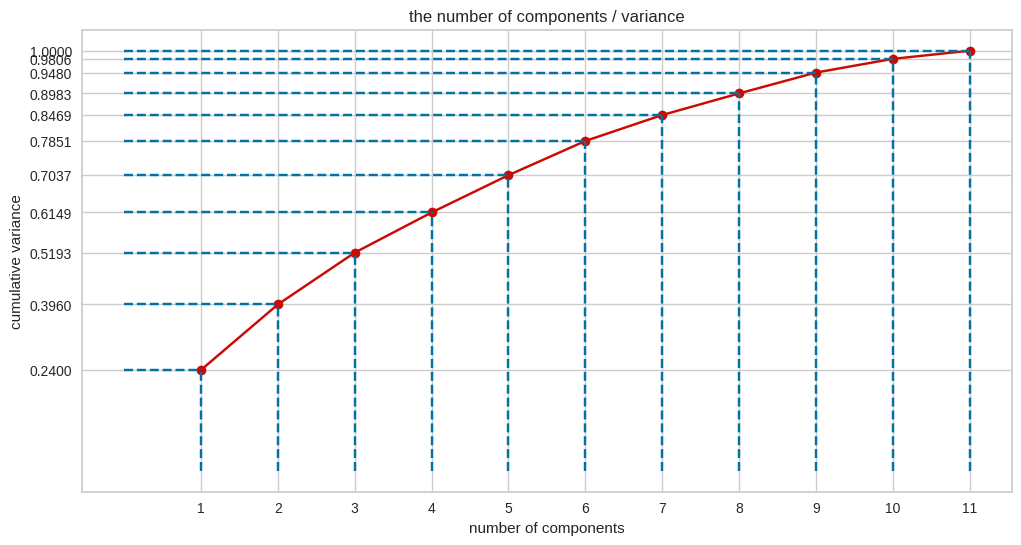

In [18]:
plt.rcParams['figure.figsize']=(12,6)
pca = PCA().fit(song_features_scaled)

plt.ylabel('cumulative variance')
plt.title('the number of components / variance')
plt.xlabel('number of components')

x = np.arange(1, 12)
y = np.cumsum(pca.explained_variance_ratio_)

plt.xticks(x)
plt.yticks(y)

plt.plot(x, y, marker='o', linestyle='-', color='r')

plt.hlines(y, 0, x, linestyle='--')
plt.vlines(x, 0, y, linestyle='--')

plt.show()

Conclusion:

These are the recommendation built for the music